In [198]:
import sys
sys.path.append('..')
from src.kitti import *
import numpy as np
import cv2
import json
%matplotlib inline

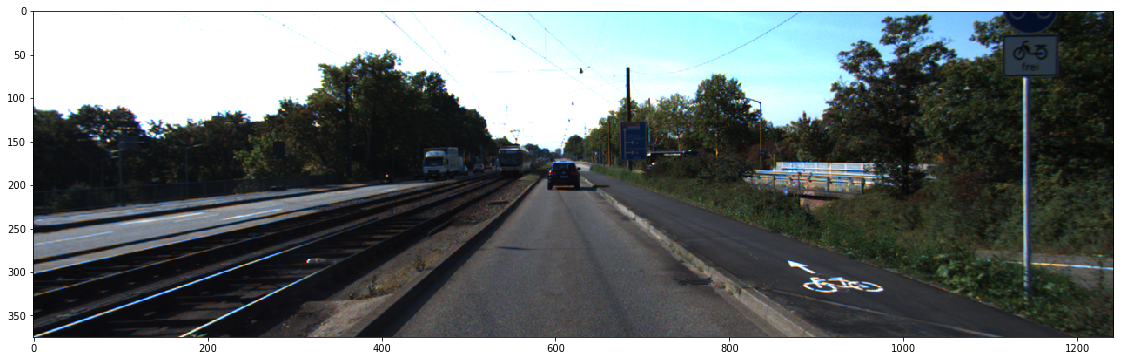

In [199]:
yolo_output = json.load(open("data/yolo/235000.json"))
def imgread(file):
    img = cv2.imread(file)
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img = imgread("data/yolo/007302.png")
show(img)

In [214]:
class BoundingBox:
    def __init__(self, classification):
        name, confidence, coords = classification
        cx, cy, width, height = coords
        
        self.object_name = name
        self.cx = cx
        self.cy = cy
        self.width = width
        self.height = height
        self.calculate_bounds()

    def calculate_bounds(self):
        #         min,                            max
        self.y = (int(self.cy - self.height / 2), int(self.cy + self.height / 2))
        self.x = (int(self.cx - self.width / 2), int(self.cx + self.width / 2))
    
    def contains(self, point):
        return (self.x[0] <= point.cx <= self.x[0] + self.width and
            self.y[0] <= point.cy <= self.y[0] + self.height)
    
    def draw(self, img, show_classifier = False, text_color=(0, 255, 0), color=(255, 0, 0)):
        font = cv2.FONT_HERSHEY_DUPLEX
        cv2.rectangle(img, (self.x[0], self.y[0]), (self.x[1], self.y[1]), color)   
        
        if show_classifier:
            cv2.putText(img, self.object_name, (self.x[0], self.y[0]), font, 0.4, text_color, 0)
            
    def debug(self):
        print("object: {} cx: {} cy: {} width: {} height: {}")

In [215]:
def format_output(json, level = 1):    
    if (level == 1):
        return format_per_image(json)
    else:
        classified_objects = []
        for img in json:
            classified_objects.append(format_per_image(img))
        
        return classified_objects

def format_per_image(json):
    classified_objects = []
    
    for classification in json:
        # Filter out image name
        if (isinstance(classification, list)):
            classified_objects.append(BoundingBox(classification))
    
    return classified_objects

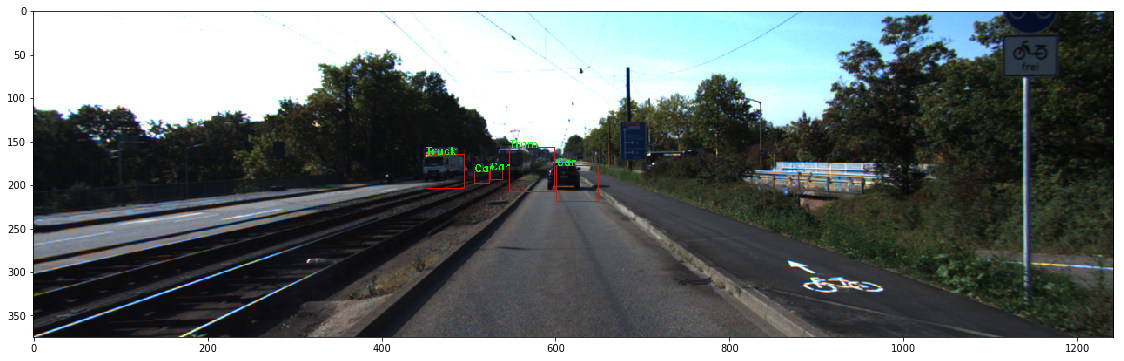

In [221]:
classifications = format_output(yolo_output[2])
for clas in classifications:
    clas.draw(img, show_classifier = True)

show(img)

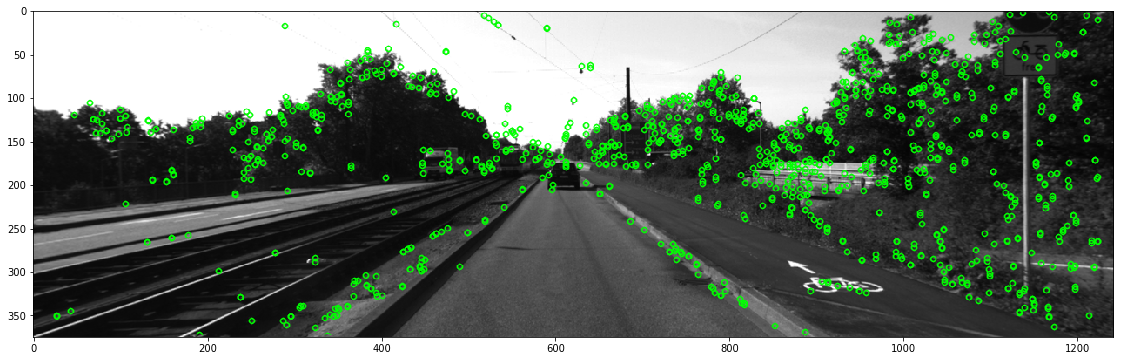

In [194]:
frame = Frame(IMAGE_LEFT, IMAGE_RIGHT)
show(draw_frame(frame))

In [222]:
observations = frame.get_observations()
points = []

# TODO: observations <-> classification name
# clas = classification
for obs in observations:
    x, y = observations[0].cx, observations[0].cy
    for clas in classifications:
        if clas.contains(obs):
            points.append(obs)

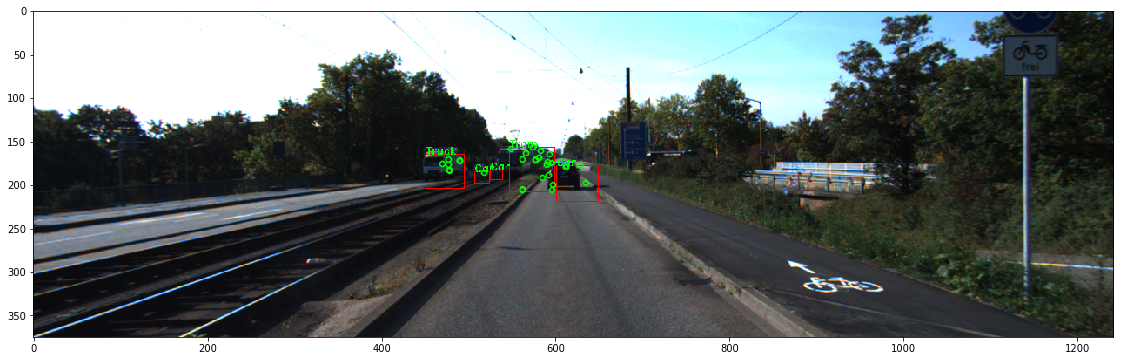

In [223]:
show(draw_observations(points, img))